## imports

In [1]:
# i will try here... donno ... start with vgg or something
#jeremy batcher can be used
from cervical_utils import *
%matplotlib inline

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
#xxx
import glob
import numpy as np
from sklearn.metrics import log_loss
#read imagesis with: PIL, cv2, keras
import cv2
from PIL import Image
from keras.preprocessing import image
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Input,Lambda,ZeroPadding2D,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout,Conv2D,Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical

from keras.applications import VGG16,ResNet50
from collections import Counter
import xgboost as xgb

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def do_clip(arr, mx):
    clipped = np.clip(arr, (1-mx)/1, mx)
    return clipped/clipped.sum(axis=1)[:, np.newaxis]

import bcolz
import pickle

def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()


def load_array(fname):
    return bcolz.open(fname)[:]


def save_pickle(fname, obj):
    with open(fname, "wb") as output_file:
        pickle.dump(obj, output_file)

def load_pickle(fname):
    with open(fname, "rb") as input_file:
        return pickle.load(input_file)

## preprocess

In [38]:
cd /mnt/kaggle_crevical

/mnt/kaggle_crevical


In [39]:
g=glob.glob('train/*/*.*')
t=glob.glob('test/*.*')

In [95]:
'train/Type_1/6903.jpg' in g

False

read large images, resize them to 224^2, save as npy

In [ ]:
#read and resize train
'''
imgs=[]
type_list=[]

for i,file in enumerate(g):
    try:
        imgs.append(image.img_to_array(image.load_img(file).resize([224,224])))
        type_list.append(file.split('/')[1])
    except:
        print (i,file,' seems corrupt')
    if i % 250 ==0:
        print (i)

imgs=np.array(imgs)
'''
#takes long to load all big pictures... save the smaller version for now

0 train/Type_1/5913.jpg  seems corrupt
0
1 train/Type_1/2003.jpg  seems corrupt
2 train/Type_1/3755.jpg  seems corrupt
3 train/Type_1/4884.jpg  seems corrupt
4 train/Type_1/845.jpg  seems corrupt
5 train/Type_1/4732.jpg  seems corrupt
6 train/Type_1/1324.jpg  seems corrupt
7 train/Type_1/6592.jpg  seems corrupt
8 train/Type_1/3946.jpg  seems corrupt
9 train/Type_1/1775.jpg  seems corrupt
10 train/Type_1/3687.jpg  seems corrupt
11 train/Type_1/2084.jpg  seems corrupt
12 train/Type_1/4918.jpg  seems corrupt
13 train/Type_1/5788.jpg  seems corrupt
14 train/Type_1/5785.jpg  seems corrupt
15 train/Type_1/2228.jpg  seems corrupt
16 train/Type_1/2973.jpg  seems corrupt
17 train/Type_1/6030.jpg  seems corrupt
18 train/Type_1/272.jpg  seems corrupt
19 train/Type_1/918.jpg  seems corrupt
20 train/Type_1/1547.jpg  seems corrupt
21 train/Type_1/6003.jpg  seems corrupt
22 train/Type_1/1059.jpg  seems corrupt
23 train/Type_1/5786.jpg  seems corrupt
24 train/Type_1/4886.jpg  seems corrupt
25 train/Ty

204 train/Type_1/116.jpg  seems corrupt
205 train/Type_1/201.jpg  seems corrupt
206 train/Type_1/2877.jpg  seems corrupt
207 train/Type_1/1060.jpg  seems corrupt
208 train/Type_1/791.jpg  seems corrupt
209 train/Type_1/6332.jpg  seems corrupt
210 train/Type_1/5988.jpg  seems corrupt
211 train/Type_1/2413.jpg  seems corrupt
212 train/Type_1/3504.jpg  seems corrupt
213 train/Type_1/6028.jpg  seems corrupt
214 train/Type_1/663.jpg  seems corrupt
215 train/Type_1/2659.jpg  seems corrupt
216 train/Type_1/4693.jpg  seems corrupt
217 train/Type_1/5357.jpg  seems corrupt
218 train/Type_1/6096.jpg  seems corrupt
219 train/Type_1/2604.jpg  seems corrupt
220 train/Type_1/3349.jpg  seems corrupt
221 train/Type_1/40.jpg  seems corrupt
222 train/Type_1/1069.jpg  seems corrupt
223 train/Type_1/1033.jpg  seems corrupt
224 train/Type_1/6157.jpg  seems corrupt
225 train/Type_1/5769.jpg  seems corrupt
226 train/Type_1/3032.jpg  seems corrupt
227 train/Type_1/1314.jpg  seems corrupt
228 train/Type_1/3976.

407 train/Type_1/5945.jpg  seems corrupt
408 train/Type_1/1730.jpg  seems corrupt
409 train/Type_1/6858.jpg  seems corrupt
410 train/Type_1/4065.jpg  seems corrupt
411 train/Type_1/6049.jpg  seems corrupt
412 train/Type_1/3034.jpg  seems corrupt
413 train/Type_1/5190.jpg  seems corrupt
414 train/Type_1/6653.jpg  seems corrupt
415 train/Type_1/4014.jpg  seems corrupt
416 train/Type_1/2588.jpg  seems corrupt
417 train/Type_1/3775.jpg  seems corrupt
418 train/Type_1/6857.jpg  seems corrupt
419 train/Type_1/1717.jpg  seems corrupt
420 train/Type_1/6748.jpg  seems corrupt
421 train/Type_1/5406.jpg  seems corrupt
422 train/Type_1/6411.jpg  seems corrupt
423 train/Type_1/2596.jpg  seems corrupt
424 train/Type_1/1807.jpg  seems corrupt
425 train/Type_1/3931.jpg  seems corrupt
426 train/Type_1/129.jpg  seems corrupt
427 train/Type_1/684.jpg  seems corrupt
428 train/Type_1/3906.jpg  seems corrupt
429 train/Type_1/1263.jpg  seems corrupt
430 train/Type_1/3242.jpg  seems corrupt
431 train/Type_1/1

610 train/Type_1/4371.jpg  seems corrupt
611 train/Type_1/87.jpg  seems corrupt
612 train/Type_1/4702.jpg  seems corrupt
613 train/Type_1/2289.jpg  seems corrupt
614 train/Type_1/5850.jpg  seems corrupt
615 train/Type_1/1288.jpg  seems corrupt
616 train/Type_1/6052.jpg  seems corrupt
617 train/Type_1/2117.jpg  seems corrupt
618 train/Type_1/866.jpg  seems corrupt
619 train/Type_1/2175.jpg  seems corrupt
620 train/Type_1/5116.jpg  seems corrupt
621 train/Type_1/6360.jpg  seems corrupt
622 train/Type_1/1412.jpg  seems corrupt
623 train/Type_1/267.jpg  seems corrupt
624 train/Type_1/2935.jpg  seems corrupt
625 train/Type_1/1061.jpg  seems corrupt
626 train/Type_1/4746.jpg  seems corrupt
627 train/Type_1/3237.jpg  seems corrupt
628 train/Type_1/1100.jpg  seems corrupt
629 train/Type_1/1535.jpg  seems corrupt
630 train/Type_1/920.jpg  seems corrupt
631 train/Type_1/5995.jpg  seems corrupt
632 train/Type_1/1361.jpg  seems corrupt
633 train/Type_1/2344.jpg  seems corrupt
634 train/Type_1/1800

812 train/Type_1/6918.jpg  seems corrupt
813 train/Type_1/6449.jpg  seems corrupt
814 train/Type_1/2492.jpg  seems corrupt
815 train/Type_1/344.jpg  seems corrupt
816 train/Type_1/3878.jpg  seems corrupt
817 train/Type_1/6371.jpg  seems corrupt
818 train/Type_1/1141.jpg  seems corrupt
819 train/Type_1/534.jpg  seems corrupt
820 train/Type_1/12.jpg  seems corrupt
821 train/Type_1/1601.jpg  seems corrupt
822 train/Type_1/6915.jpg  seems corrupt
823 train/Type_1/1404.jpg  seems corrupt
824 train/Type_1/1200.jpg  seems corrupt
825 train/Type_1/3756.jpg  seems corrupt
826 train/Type_1/3454.jpg  seems corrupt
827 train/Type_1/3801.jpg  seems corrupt
828 train/Type_1/2394.jpg  seems corrupt
829 train/Type_1/6029.jpg  seems corrupt
830 train/Type_1/1785.jpg  seems corrupt
831 train/Type_1/6448.jpg  seems corrupt
832 train/Type_1/4047.jpg  seems corrupt
833 train/Type_1/863.jpg  seems corrupt
834 train/Type_1/446.jpg  seems corrupt
835 train/Type_1/2446.jpg  seems corrupt
836 train/Type_1/1822.

1015 train/Type_1/3415.jpg  seems corrupt
1016 train/Type_1/1217.jpg  seems corrupt
1017 train/Type_1/416.jpg  seems corrupt
1018 train/Type_1/229.jpg  seems corrupt
1019 train/Type_1/4023.jpg  seems corrupt
1020 train/Type_1/3989.jpg  seems corrupt
1021 train/Type_1/833.jpg  seems corrupt
1022 train/Type_1/2644.jpg  seems corrupt
1023 train/Type_1/6498.jpg  seems corrupt
1024 train/Type_1/5768.jpg  seems corrupt
1025 train/Type_1/638.jpg  seems corrupt
1026 train/Type_1/1026.jpg  seems corrupt
1027 train/Type_1/977.jpg  seems corrupt
1028 train/Type_1/1716.jpg  seems corrupt
1029 train/Type_1/751.jpg  seems corrupt
1030 train/Type_1/1123.jpg  seems corrupt
1031 train/Type_1/2210.jpg  seems corrupt
1032 train/Type_1/6050.jpg  seems corrupt
1033 train/Type_1/6507.jpg  seems corrupt
1034 train/Type_1/5411.jpg  seems corrupt
1035 train/Type_1/3136.jpg  seems corrupt
1036 train/Type_1/41.jpg  seems corrupt
1037 train/Type_1/160.jpg  seems corrupt
1038 train/Type_1/2763.jpg  seems corrupt
1

1212 train/Type_1/3611.jpg  seems corrupt
1213 train/Type_1/2234.jpg  seems corrupt
1214 train/Type_1/3442.jpg  seems corrupt
1215 train/Type_1/2764.jpg  seems corrupt
1216 train/Type_1/6504.jpg  seems corrupt
1217 train/Type_1/439.jpg  seems corrupt
1218 train/Type_1/739.jpg  seems corrupt
1219 train/Type_1/2664.jpg  seems corrupt
1220 train/Type_1/1465.jpg  seems corrupt
1221 train/Type_1/473.jpg  seems corrupt
1222 train/Type_1/2871.jpg  seems corrupt
1223 train/Type_1/6025.jpg  seems corrupt
1224 train/Type_1/6103.jpg  seems corrupt
1225 train/Type_1/1671.jpg  seems corrupt
1226 train/Type_1/5994.jpg  seems corrupt
1227 train/Type_1/5901.jpg  seems corrupt
1228 train/Type_1/4050.jpg  seems corrupt
1229 train/Type_1/1009.jpg  seems corrupt
1230 train/Type_1/539.jpg  seems corrupt
1231 train/Type_1/1313.jpg  seems corrupt
1232 train/Type_1/2340.jpg  seems corrupt
1233 train/Type_1/975.jpg  seems corrupt
1234 train/Type_1/6787.jpg  seems corrupt
1235 train/Type_1/3929.jpg  seems corru

1409 train/Type_2/4.jpg  seems corrupt
1410 train/Type_2/2639.jpg  seems corrupt
1411 train/Type_2/2662.jpg  seems corrupt
1412 train/Type_2/1998.jpg  seems corrupt
1413 train/Type_2/1511.jpg  seems corrupt
1414 train/Type_2/4348.jpg  seems corrupt
1415 train/Type_2/4210.jpg  seems corrupt
1416 train/Type_2/898.jpg  seems corrupt
1417 train/Type_2/2938.jpg  seems corrupt
1418 train/Type_2/5004.jpg  seems corrupt
1419 train/Type_2/5858.jpg  seems corrupt
1420 train/Type_2/3334.jpg  seems corrupt
1421 train/Type_2/4188.jpg  seems corrupt
1422 train/Type_2/3213.jpg  seems corrupt
1423 train/Type_2/6123.jpg  seems corrupt
1424 train/Type_2/6147.jpg  seems corrupt
1425 train/Type_2/3956.jpg  seems corrupt
1426 train/Type_2/832.jpg  seems corrupt
1427 train/Type_2/2589.jpg  seems corrupt
1428 train/Type_2/2188.jpg  seems corrupt
1429 train/Type_2/3646.jpg  seems corrupt
1430 train/Type_2/6825.jpg  seems corrupt
1431 train/Type_2/3967.jpg  seems corrupt
1432 train/Type_2/1652.jpg  seems corru

1605 train/Type_2/3462.jpg  seems corrupt
1606 train/Type_2/4058.jpg  seems corrupt
1607 train/Type_2/4897.jpg  seems corrupt
1608 train/Type_2/3612.jpg  seems corrupt
1609 train/Type_2/512.jpg  seems corrupt
1610 train/Type_2/3282.jpg  seems corrupt
1611 train/Type_2/6485.jpg  seems corrupt
1612 train/Type_2/3422.jpg  seems corrupt
1613 train/Type_2/4450.jpg  seems corrupt
1614 train/Type_2/761.jpg  seems corrupt
1615 train/Type_2/6033.jpg  seems corrupt
1616 train/Type_2/3351.jpg  seems corrupt
1617 train/Type_2/1584.jpg  seems corrupt
1618 train/Type_2/2880.jpg  seems corrupt
1619 train/Type_2/1172.jpg  seems corrupt
1620 train/Type_2/781.jpg  seems corrupt
1621 train/Type_2/1667.jpg  seems corrupt
1622 train/Type_2/4588.jpg  seems corrupt
1623 train/Type_2/2294.jpg  seems corrupt
1624 train/Type_2/1083.jpg  seems corrupt
1625 train/Type_2/4519.jpg  seems corrupt
1626 train/Type_2/364.jpg  seems corrupt
1627 train/Type_2/6068.jpg  seems corrupt
1628 train/Type_2/373.jpg  seems corru

1802 train/Type_2/4367.jpg  seems corrupt
1803 train/Type_2/1500.jpg  seems corrupt
1804 train/Type_2/1244.jpg  seems corrupt
1805 train/Type_2/2956.jpg  seems corrupt
1806 train/Type_2/4728.jpg  seems corrupt
1807 train/Type_2/2873.jpg  seems corrupt
1808 train/Type_2/1192.jpg  seems corrupt
1809 train/Type_2/2319.jpg  seems corrupt
1810 train/Type_2/1438.jpg  seems corrupt
1811 train/Type_2/3490.jpg  seems corrupt
1812 train/Type_2/4835.jpg  seems corrupt
1813 train/Type_2/4214.jpg  seems corrupt
1814 train/Type_2/5757.jpg  seems corrupt
1815 train/Type_2/1169.jpg  seems corrupt
1816 train/Type_2/3459.jpg  seems corrupt
1817 train/Type_2/3586.jpg  seems corrupt
1818 train/Type_2/2549.jpg  seems corrupt
1819 train/Type_2/5740.jpg  seems corrupt
1820 train/Type_2/6674.jpg  seems corrupt
1821 train/Type_2/1311.jpg  seems corrupt
1822 train/Type_2/3271.jpg  seems corrupt
1823 train/Type_2/3565.jpg  seems corrupt
1824 train/Type_2/4007.jpg  seems corrupt
1825 train/Type_2/4246.jpg  seems 

In [45]:
#read and process test
test_imgs=[]
test_ids=[]
test_imgs_227=[]
missing_test_indices=[]
missing_test_files=[]
for i,file in enumerate(t):
    try:
        test_imgs.append(np.array(image.load_img(file).resize([224,224])))
        #test_imgs_227.append(np.array(image.load_img(file).resize([227,227])))
        test_ids.append(file.split('/')[1])

    except:
        print (i,file,' seems corrupt')
        
    if i % 250 ==10:
        print (i)
test_imgs=np.array(test_imgs)
#takes long to load all big pictures... save the smaller version for now

/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: U

10


/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 204865536 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 205389824 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 550502400 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 205914112 bytes but only got 11542. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlug

/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 670171136 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 219021312 bytes but only got 13568. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 613416960 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 219021312 bytes but only got 12702. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImage

260


/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 471859200 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 205914112 bytes but only got 10342. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 467402752 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 219021312 bytes but only got 10474. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImage

/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 668860416 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 219021312 bytes but only got 13548. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 647168000 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 205914112 bytes but only got 13017. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/TiffImage

510


In [47]:
cd .

/mnt/kaggle_crevical


In [48]:
save_array('shrunk_files/test',test_imgs)

In [509]:
#save_array('train/shrunk_files/data_full',imgs)

In [7]:
imgs=load_array('shrunk_files/data_thin_227')
type_list=load_pickle('shrunk_files/y_thin')

In [46]:
type_list

array([1, 1, 1, ..., 3, 3, 3])

In [47]:
if 'Type_1' in type_list:
    type_1_idx=np.array([i=='Type_1' for i in type_list])
    type_2_idx=np.array([i=='Type_2' for i in type_list])
    type_3_idx=np.array([i=='Type_3' for i in type_list])
    types=type_1_idx*1+type_2_idx*2+type_3_idx*3
else:
    types=type_list

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


## load

In [31]:
imgs=load_array('/mnt/kaggle_crevical/shrunk_files/data_full')
types=load_pickle('/mnt/kaggle_crevical/shrunk_files/type_list.p')
test_imgs=load_array('/mnt/kaggle_crevical/shrunk_files/test')

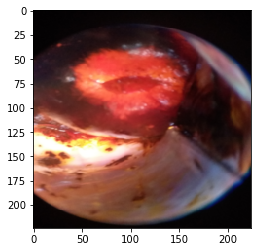

In [34]:
plt.imshow(data_full[1])

In [15]:
type2num={'Type_1':0,'Type_2':1,'Type_3':2}

In [20]:

types_coded=[type2num[type] for type in types]

## resnet and vgg

### vgg

In [17]:
vgg=VGG16()

In [18]:
vgg_preds=vgg.predict(imgs)

KeyboardInterrupt: 

### resnet

In [65]:
test_imgs_processed=preprocess_input(test_imgs.astype('float32'))
imgs_processed=preprocess_input(imgs.astype('float32'))

In [ ]:
resnet=ResNet50()

In [ ]:
plt.imshow(imgs[1])

In [73]:
% time preds_res=resnet.predict(imgs_processed)
# 1:40 minutes

CPU times: user 38.8 s, sys: 6.11 s, total: 44.9 s
Wall time: 1min 39s


In [31]:
trn_imgs.shape,val_imgs.shape,y.shape,y_val.shape

((1110, 227, 227, 3), (370, 227, 227, 3), (1110,), (370,))

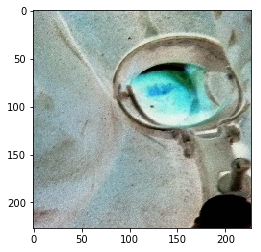

In [32]:
plt.imshow(trn_imgs[0])

## simple model

In [51]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


batch_size = 16

generator = train_datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',  # this means our generator will only yield batches of data, no labels
        shuffle=False)

Found 7626 images belonging to 3 classes.


In [43]:
new_model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
new_model.fit_generator(
        generator,
        samples_per_epoch=2000 // batch_size,
        nb_epoch=50,
        #validation_data=validation_generator,
        #validation_steps=800 // batch_size
)

Epoch 1/50
128/125 [==============================] - 30s - loss: 15.4885 - acc: 0.0391    

/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '



Epoch 2/50
128/125 [==============================] - 29s - loss: 15.7403 - acc: 0.0234    
Epoch 3/50
128/125 [==============================] - 30s - loss: 15.7403 - acc: 0.0234    
Epoch 4/50
 80/125 [==================>...........] - ETA: 10s - loss: 15.7151 - acc: 0.0250   

KeyboardInterrupt: 

In [40]:
early_stopping =EarlyStopping(monitor='val_loss', patience=3)
results_path='/mnt/kaggle_crevical/results/'
STAMP='small_model'
bst_model_path = results_path+STAMP + '.h5'

model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

hist = new_model.fit(trn_imgs,to_categorical(y-1), \
        validation_data=(val_imgs,to_categorical(y_val-1)), \
        nb_epoch=200, shuffle=True, \
        callbacks=[early_stopping, model_checkpoint])

Train on 5337 samples, validate on 2288 samples
Epoch 1/200
5337/5337 [==============================] - 25s - loss: 10.4597 - acc: 0.3502 - val_loss: 7.8618 - val_acc: 0.5122
Epoch 2/200
1408/5337 [======>.......................] - ETA: 15s - loss: 9.9937 - acc: 0.3800

KeyboardInterrupt: 

## finetune VGG

In [11]:
from keras.layers import Dense,BatchNormalization,Flatten,Dropout,MaxPooling2D
from keras.layers.convolutional import Convolution2D 
from keras.models import Model,Sequential
from keras.optimizers import Adam

In [8]:
def split_at(model, layer_type):
    layers = model.layers
    layer_idx = [index for index,layer in enumerate(layers) if type(layer) is layer_type][-1]
    return layers[:layer_idx+1], layers[layer_idx+1:]

In [9]:
conv_layers,fc_layers = split_at(vgg, Convolution2D)

In [12]:
conv_model = Sequential(conv_layers)

In [519]:
conv_trn=conv_model.predict(trn)
conv_val=conv_model.predict(val)

In [524]:
save_array('train/shrunk_files/conv_trn',conv_trn)
save_array('train/shrunk_files/conv_val',conv_val)
save_pickle('train/shrunk_files/y.p',y)
save_pickle('train/shrunk_files/y_val.p',y_val)

In [15]:
cd ..

/mnt/kaggle_crevical


In [19]:
conv_trn=load_array('train/shrunk_files/conv_trn')
conv_val=load_array('train/shrunk_files/conv_val')
y=load_pickle('train/shrunk_files/y.p')
y_val=load_pickle('train/shrunk_files/y_val.p')

In [27]:
# bn layers
p=0.7
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        BatchNormalization(axis=1),
        Dropout(p/4),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(3, activation='softmax')
    ]

In [28]:
model1 =Sequential(get_bn_layers(p))

In [29]:
model1.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y

In [31]:
model1.fit(conv_trn, to_categorical(y)[:,1:], batch_size=32 \
           ,validation_data=(conv_val,to_categorical(y_val)[:,1:]))

Train on 5337 samples, validate on 2288 samples
Epoch 1/10
5337/5337 [==============================] - 34s - loss: 1.3764 - acc: 0.4570 - val_loss: 1.0933 - val_acc: 0.5389
Epoch 2/10
5337/5337 [==============================] - 34s - loss: 1.0085 - acc: 0.5451 - val_loss: 0.8607 - val_acc: 0.6023
Epoch 3/10
5337/5337 [==============================] - 34s - loss: 0.8056 - acc: 0.6386 - val_loss: 0.8368 - val_acc: 0.6320
Epoch 4/10
5337/5337 [==============================] - 34s - loss: 0.6566 - acc: 0.7146 - val_loss: 0.8895 - val_acc: 0.6351
Epoch 5/10
5337/5337 [==============================] - 34s - loss: 0.5698 - acc: 0.7590 - val_loss: 0.8526 - val_acc: 0.6552
Epoch 6/10
5312/5337 [============================>.] - ETA: 0s - loss: 0.5244 - acc: 0.7803

KeyboardInterrupt: 

#### some plots stuff

In [397]:
# lets see what vgg says, top 5:
#top_preds=np.argsort(preds)[:,:5]
top_20_1=np.array(Counter(np.argsort(preds[np.array(type_1_idx),:])[:,:5].flatten()).most_common()[:20])
top_20_2=np.array(Counter(np.argsort(preds[np.array(type_2_idx),:])[:,:5].flatten()).most_common()[:20])
top_20_3=np.array(Counter(np.argsort(preds[np.array(type_3_idx),:])[:,:5].flatten()).most_common()[:20])

In [398]:
df_1=pd.DataFrame(top_20_1,columns=[0,1]).set_index(0)
df_2=pd.DataFrame(top_20_2,columns=[0,2]).set_index(0)
df_3=pd.DataFrame(top_20_3,columns=[0,3]).set_index(0)

In [176]:
combined=df_1.join(df_2,how='outer').join(df_3,how='outer')

In [177]:
sums=combined/combined.sum()

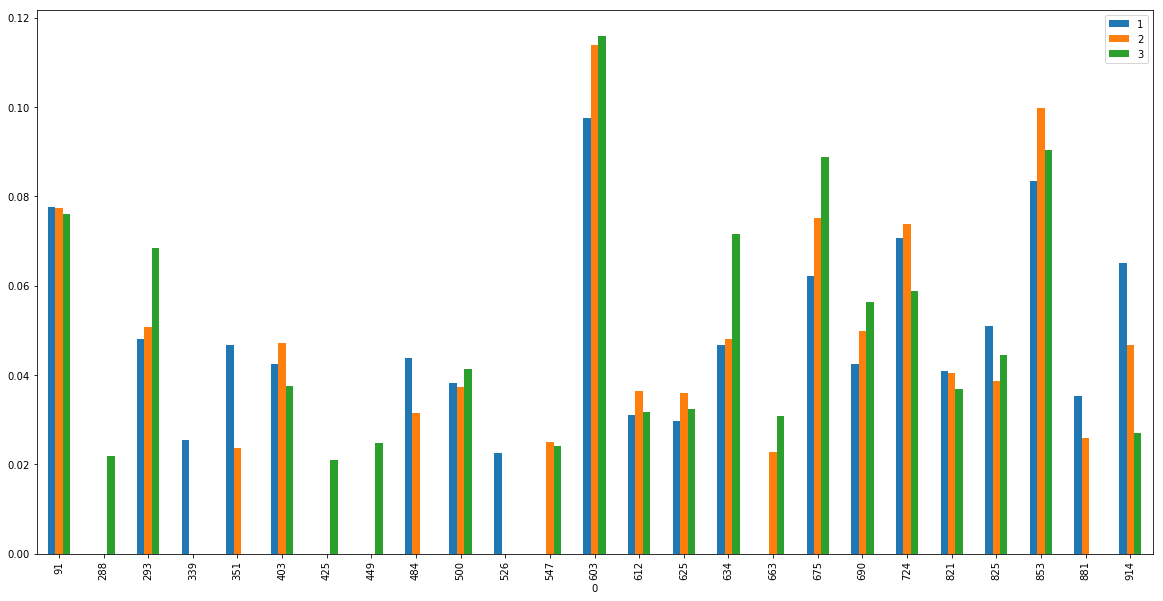

In [178]:
sums.plot.bar(figsize=[20,10])

## xgboost

### combined preds

In [59]:
from keras_squeezenet import SqueezeNet
model_squeeze=SqueezeNet()

In [60]:
preds_squeezenet=model_squeeze.predict(imgs)

In [61]:
preds_squeezenet.shape

(1480, 1000)

In [64]:
preds_combined=np.concatenate([res_preds,preds_squeezenet],axis=1)

### xgb model

In [71]:
len(preds_res)

512

In [74]:
train_index, test_index = train_test_split(range(len(preds_res)))
trn, val = preds_res[train_index], preds_res[test_index]
y, y_val = np.array(types_coded)[train_index], np.array(types_coded)[test_index]

In [75]:
clf = xgb.XGBClassifier(max_depth=10, n_estimators=1500,min_child_weight=9,learning_rate=0.01,
                       nthread=8, subsample=0.80,colsample_bytree=0.80,seed=4242)

#learning rate .05 => 0.98 vgg
#learning rate .005 => 0.96 vgg
#resnet: 0.81,0.8, 0.01=>0.79,.78 preprocessed-0.87LB
#resnet_squeezenet - .82 on small data
clf.fit(trn , y,eval_set=[(val, y_val)], eval_metric='mlogloss', verbose=True, early_stopping_rounds=50)
#, eval_set=[(val_x, val_y)]

[0]	validation_0-mlogloss:1.09573
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.09284
[2]	validation_0-mlogloss:1.09003
[3]	validation_0-mlogloss:1.08744
[4]	validation_0-mlogloss:1.08457
[5]	validation_0-mlogloss:1.08194
[6]	validation_0-mlogloss:1.07946
[7]	validation_0-mlogloss:1.07687
[8]	validation_0-mlogloss:1.07412
[9]	validation_0-mlogloss:1.07165
[10]	validation_0-mlogloss:1.06914
[11]	validation_0-mlogloss:1.06675
[12]	validation_0-mlogloss:1.06421
[13]	validation_0-mlogloss:1.06186
[14]	validation_0-mlogloss:1.05928
[15]	validation_0-mlogloss:1.05692
[16]	validation_0-mlogloss:1.05444
[17]	validation_0-mlogloss:1.05216
[18]	validation_0-mlogloss:1.04973
[19]	validation_0-mlogloss:1.04738
[20]	validation_0-mlogloss:1.04508
[21]	validation_0-mlogloss:1.04273
[22]	validation_0-mlogloss:1.04069
[23]	validation_0-mlogloss:1.0385
[24]	validation_0-mlogloss:1.03629
[25]	validation_0-mlogloss:1.03409
[26]	validation_0-mlogloss:1.032

[225]	validation_0-mlogloss:0.842173
[226]	validation_0-mlogloss:0.841729
[227]	validation_0-mlogloss:0.841287
[228]	validation_0-mlogloss:0.840866
[229]	validation_0-mlogloss:0.840499
[230]	validation_0-mlogloss:0.840169
[231]	validation_0-mlogloss:0.839626
[232]	validation_0-mlogloss:0.839333
[233]	validation_0-mlogloss:0.838861
[234]	validation_0-mlogloss:0.838465
[235]	validation_0-mlogloss:0.838144
[236]	validation_0-mlogloss:0.837652
[237]	validation_0-mlogloss:0.83732
[238]	validation_0-mlogloss:0.837001
[239]	validation_0-mlogloss:0.836539
[240]	validation_0-mlogloss:0.836165
[241]	validation_0-mlogloss:0.835778
[242]	validation_0-mlogloss:0.835474
[243]	validation_0-mlogloss:0.835091
[244]	validation_0-mlogloss:0.834645
[245]	validation_0-mlogloss:0.834218
[246]	validation_0-mlogloss:0.833825
[247]	validation_0-mlogloss:0.833491
[248]	validation_0-mlogloss:0.833044
[249]	validation_0-mlogloss:0.832765
[250]	validation_0-mlogloss:0.832425
[251]	validation_0-mlogloss:0.832072
[2

[448]	validation_0-mlogloss:0.790488
[449]	validation_0-mlogloss:0.790298
[450]	validation_0-mlogloss:0.790144
[451]	validation_0-mlogloss:0.78992
[452]	validation_0-mlogloss:0.789761
[453]	validation_0-mlogloss:0.789705
[454]	validation_0-mlogloss:0.789513
[455]	validation_0-mlogloss:0.789386
[456]	validation_0-mlogloss:0.789258
[457]	validation_0-mlogloss:0.789182
[458]	validation_0-mlogloss:0.789074
[459]	validation_0-mlogloss:0.788964
[460]	validation_0-mlogloss:0.788885
[461]	validation_0-mlogloss:0.788772
[462]	validation_0-mlogloss:0.788679
[463]	validation_0-mlogloss:0.788499
[464]	validation_0-mlogloss:0.788391
[465]	validation_0-mlogloss:0.78826
[466]	validation_0-mlogloss:0.788132
[467]	validation_0-mlogloss:0.788082
[468]	validation_0-mlogloss:0.787945
[469]	validation_0-mlogloss:0.787834
[470]	validation_0-mlogloss:0.787697
[471]	validation_0-mlogloss:0.787558
[472]	validation_0-mlogloss:0.787426
[473]	validation_0-mlogloss:0.787445
[474]	validation_0-mlogloss:0.787373
[47

[671]	validation_0-mlogloss:0.770512
[672]	validation_0-mlogloss:0.770412
[673]	validation_0-mlogloss:0.770365
[674]	validation_0-mlogloss:0.770262
[675]	validation_0-mlogloss:0.770199
[676]	validation_0-mlogloss:0.770115
[677]	validation_0-mlogloss:0.770074
[678]	validation_0-mlogloss:0.76998
[679]	validation_0-mlogloss:0.769904
[680]	validation_0-mlogloss:0.769862
[681]	validation_0-mlogloss:0.769855
[682]	validation_0-mlogloss:0.769803
[683]	validation_0-mlogloss:0.769761
[684]	validation_0-mlogloss:0.769739
[685]	validation_0-mlogloss:0.769691
[686]	validation_0-mlogloss:0.769615
[687]	validation_0-mlogloss:0.76942
[688]	validation_0-mlogloss:0.769355
[689]	validation_0-mlogloss:0.769371
[690]	validation_0-mlogloss:0.769322
[691]	validation_0-mlogloss:0.769315
[692]	validation_0-mlogloss:0.769208
[693]	validation_0-mlogloss:0.769195
[694]	validation_0-mlogloss:0.769161
[695]	validation_0-mlogloss:0.769098
[696]	validation_0-mlogloss:0.768976
[697]	validation_0-mlogloss:0.768961
[69

[894]	validation_0-mlogloss:0.759986
[895]	validation_0-mlogloss:0.759937
[896]	validation_0-mlogloss:0.759898
[897]	validation_0-mlogloss:0.759871
[898]	validation_0-mlogloss:0.759819
[899]	validation_0-mlogloss:0.7597
[900]	validation_0-mlogloss:0.759609
[901]	validation_0-mlogloss:0.759612
[902]	validation_0-mlogloss:0.759604
[903]	validation_0-mlogloss:0.759557
[904]	validation_0-mlogloss:0.759541
[905]	validation_0-mlogloss:0.759475
[906]	validation_0-mlogloss:0.75944
[907]	validation_0-mlogloss:0.759443
[908]	validation_0-mlogloss:0.759407
[909]	validation_0-mlogloss:0.759412
[910]	validation_0-mlogloss:0.759405
[911]	validation_0-mlogloss:0.759366
[912]	validation_0-mlogloss:0.759347
[913]	validation_0-mlogloss:0.759304
[914]	validation_0-mlogloss:0.75931
[915]	validation_0-mlogloss:0.759336
[916]	validation_0-mlogloss:0.759256
[917]	validation_0-mlogloss:0.759226
[918]	validation_0-mlogloss:0.759184
[919]	validation_0-mlogloss:0.759176
[920]	validation_0-mlogloss:0.759134
[921]

[1114]	validation_0-mlogloss:0.752932
[1115]	validation_0-mlogloss:0.7529
[1116]	validation_0-mlogloss:0.75286
[1117]	validation_0-mlogloss:0.752863
[1118]	validation_0-mlogloss:0.752818
[1119]	validation_0-mlogloss:0.752774
[1120]	validation_0-mlogloss:0.752763
[1121]	validation_0-mlogloss:0.752785
[1122]	validation_0-mlogloss:0.752727
[1123]	validation_0-mlogloss:0.752721
[1124]	validation_0-mlogloss:0.752674
[1125]	validation_0-mlogloss:0.752682
[1126]	validation_0-mlogloss:0.752705
[1127]	validation_0-mlogloss:0.752661
[1128]	validation_0-mlogloss:0.75268
[1129]	validation_0-mlogloss:0.752626
[1130]	validation_0-mlogloss:0.75259
[1131]	validation_0-mlogloss:0.752548
[1132]	validation_0-mlogloss:0.752557
[1133]	validation_0-mlogloss:0.752528
[1134]	validation_0-mlogloss:0.752537
[1135]	validation_0-mlogloss:0.752506
[1136]	validation_0-mlogloss:0.752497
[1137]	validation_0-mlogloss:0.752484
[1138]	validation_0-mlogloss:0.752487
[1139]	validation_0-mlogloss:0.752493
[1140]	validation

[1331]	validation_0-mlogloss:0.748957
[1332]	validation_0-mlogloss:0.748878
[1333]	validation_0-mlogloss:0.748872
[1334]	validation_0-mlogloss:0.748835
[1335]	validation_0-mlogloss:0.74885
[1336]	validation_0-mlogloss:0.748847
[1337]	validation_0-mlogloss:0.748827
[1338]	validation_0-mlogloss:0.748832
[1339]	validation_0-mlogloss:0.748834
[1340]	validation_0-mlogloss:0.748837
[1341]	validation_0-mlogloss:0.748839
[1342]	validation_0-mlogloss:0.748831
[1343]	validation_0-mlogloss:0.748807
[1344]	validation_0-mlogloss:0.748791
[1345]	validation_0-mlogloss:0.748797
[1346]	validation_0-mlogloss:0.748778
[1347]	validation_0-mlogloss:0.748782
[1348]	validation_0-mlogloss:0.748704
[1349]	validation_0-mlogloss:0.748718
[1350]	validation_0-mlogloss:0.748707
[1351]	validation_0-mlogloss:0.748738
[1352]	validation_0-mlogloss:0.748717
[1353]	validation_0-mlogloss:0.748681
[1354]	validation_0-mlogloss:0.748697
[1355]	validation_0-mlogloss:0.748699
[1356]	validation_0-mlogloss:0.748731
[1357]	valida

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=9, missing=None, n_estimators=1500, nthread=8,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.8)

In [76]:
sum(clf.predict(val)==y_val)/len(y_val)

0.66229680125852119

In [77]:
y_pred=clf.predict_proba(val)

In [78]:
np.unique(y_pred),np.unique(y_val)

(array([ 0.00379201,  0.00390158,  0.003929  , ...,  0.98051041,
         0.98545396,  0.9872126 ], dtype=float32), array([0, 1, 2]))

In [79]:
val_log_los=log_loss(y_val,y_pred)
val_log_los

0.74726210742081234

## submission

In [40]:
sub_preds=model1.predict(test_pre_preds)

 #### resnet/vgg + xgboost

In [81]:
test_preds=resnet.predict(test_imgs_processed)

In [82]:
sub_preds=clf.predict_proba(test_preds)

In [83]:
new_preds_1 = do_clip(sub_preds,0.99) #82->.89
                                      #94->872  
                                     #97->871  
                                    #99->869,best  

In [84]:
classes = ['Type_1','Type_2','Type_3']
submission = pd.DataFrame(new_preds_1, columns=classes)

In [85]:
submission.insert(0,'image_name', test_ids)

In [86]:
submission.head()#,len(submission)

,image_name,Type_1,Type_2,Type_3
0,488.jpg,0.053001,0.804202,0.142797
1,389.jpg,0.119440,0.849109,0.031452
2,4.jpg,0.009999,0.164827,0.825173
3,166.jpg,0.152272,0.379332,0.468395
4,290.jpg,0.209208,0.569642,0.221150


In [87]:
len(submission) #512

512

In [88]:
name='resnet+xgb+preprocess'

In [89]:
#submission.to_csv('squeeze_rez_xgb', index=False)

In [90]:
save_dir='/home/ubuntu/Dropbox/kaggle_cervical/model_output/'

In [91]:
import time

sub_name = save_dir + time.strftime("%Y_%m_%d_%H_%M") + name \
+'_'+str(val_log_los).replace('.','')+ '.csv'

submission.to_csv(sub_name, index=False)

## output